# Deep Learning on MNIST Dataset

In [1]:
import numpy as np
import pandas as pd 
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline


### load dataset and get insights of it

In [2]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [3]:
print(x_train)
print(y_train)
print(x_train.shape)
print(y_train.shape)


[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
[5 0 4 ... 5 6 8]
(60000, 28, 28)
(60000,)


### check out data in x_rain and y_train and test set too

In [4]:
# data contains values ranging from 0 to 255
# There are 60k records in x_train each record having size 28*28

print(x_train[0].shape)
print(x_train[0])

print(y_train[0].shape)
print(y_train[0])



(28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 2

In [5]:
# it contains the 28 * 28 matrix of an image
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
print(x_test.shape)
print(x_test)
print(y_test.shape)
print(y_test)

(10000, 28, 28)
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
(10000,)
[7 2 1 ... 4 5 6]


### Data Scalling
 data scalling is needed as data values are ranging from 0 to 255
 it may affect the performance of the model

In [7]:
x_train = x_train/255
x_test = x_test/255

In [8]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

### convert 3 d array to 2 d array


In [9]:
x_train_flat = x_train.reshape(len(x_train), 28*28)
x_test_flat = x_test.reshape(len(x_test), 28*28)

In [10]:
print(x_train_flat.shape)
print(x_test_flat.shape)
x_train[0]

(60000, 784)
(10000, 784)


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

### Build Model

In [11]:
model = keras.Sequential([
    
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
    ])
model.compile(optimizer='adam',
    #loss= "categorical_crossentropy",
    loss= "sparse_categorical_crossentropy",
    metrics= ["accuracy"])
model.fit(x_train_flat, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 2s 975us/step - loss: 0.4891 - accuracy: 0.8766
Epoch 2/5
1875/1875 [==============================] - 2s 986us/step - loss: 0.3062 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 2s 856us/step - loss: 0.2859 - accuracy: 0.9206
Epoch 4/5
1875/1875 [==============================] - 2s 801us/step - loss: 0.2747 - accuracy: 0.9240
Epoch 5/5
1875/1875 [==============================] - 2s 821us/step - loss: 0.2674 - accuracy: 0.9255


In [12]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation='sigmoid')])

model.compile(optimizer='adam',
    loss= "sparse_categorical_crossentropy",
    metrics= ["accuracy"])
model.fit(x_train_flat, y_train, epochs =50)

Epoch 1/50
1875/1875 [==============================] - 2s 861us/step - loss: 0.4862 - accuracy: 0.8789
Epoch 2/50
1875/1875 [==============================] - 2s 864us/step - loss: 0.3057 - accuracy: 0.9155
Epoch 3/50
1875/1875 [==============================] - 2s 856us/step - loss: 0.2851 - accuracy: 0.9213
Epoch 4/50
1875/1875 [==============================] - 2s 807us/step - loss: 0.2750 - accuracy: 0.9241
Epoch 5/50
1875/1875 [==============================] - 2s 807us/step - loss: 0.2678 - accuracy: 0.9260
Epoch 6/50
1875/1875 [==============================] - 2s 810us/step - loss: 0.2625 - accuracy: 0.9274
Epoch 7/50
1875/1875 [==============================] - 2s 814us/step - loss: 0.2587 - accuracy: 0.9281
Epoch 8/50
1875/1875 [==============================] - 2s 819us/step - loss: 0.2554 - accuracy: 0.9291
Epoch 9/50
1875/1875 [==============================] - 2s 816us/step - loss: 0.2527 - accuracy: 0.9311
Epoch 10/50
1875/1875 [==============================] - 2s 819u

In [13]:
model.evaluate(x_test_flat,y_test)

313/313 [==============================] - 0s 632us/step - loss: 0.2707 - accuracy: 0.9292


[0.27074429392814636, 0.9291999936103821]

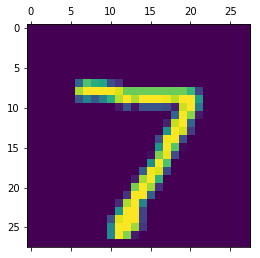

In [14]:
plt.matshow(x_test[0])

In [15]:
y_pred = model.predict(x_test_flat)

In [16]:
# Here the probability of having digit 7 is 7.6936896e-17 
# is greater than all other probabilities
y_pred[0]

array([1.5463340e-10, 1.1816756e-18, 1.2160818e-09, 2.2798777e-04,
       2.4401523e-09, 3.4441298e-06, 6.6788111e-17, 3.7400967e-01,
       1.9234533e-06, 3.3259072e-05], dtype=float32)

In [17]:
np.argmax(y_pred[0])

7

In [18]:
y_predicted_labels = [np.argmax(i) for i in y_pred]

In [19]:
y_predicted_labels

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 6,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 3,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 6,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 9,
 2,
 7,
 4,
 3,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 9,
 3,
 1,
 4,
 1,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 9,
 9,
 2,
 1,
 9,
 4,
 8,
 1,
 3,
 9,
 7,
 4,
 4,
 4,
 9,
 8,
 5,
 4,
 7,
 6,
 7,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 9,
 9,
 9,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 3,
 0,
 5,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 7,
 9,
 3,
 9,
 0,
 3,
 6,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 7,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 3,
 8,
 7,
 2,
 3,
 0,
 6,
 4,
 2,


In [20]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

In [21]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 956,    0,    0,    3,    1,    8,    8,    3,    1,    0],
       [   0, 1114,    5,    1,    0,    1,    4,    2,    8,    0],
       [   4,    9,  928,   12,    9,    5,   15,    8,   39,    3],
       [   3,    0,   13,  916,    1,   28,    4,   10,   26,    9],
       [   1,    4,    4,    2,  915,    0,   12,    6,    8,   30],
       [   9,    4,    1,   28,    6,  790,   17,    5,   29,    3],
       [   9,    3,    2,    2,    6,   11,  922,    1,    2,    0],
       [   1,    9,   21,    4,    5,    2,    0,  949,    3,   34],
       [   7,    8,    4,   19,    7,   29,   11,    8,  870,   11],
       [   7,    8,    1,    8,   15,   10,    0,   18,   10,  932]],
      dtype=int32)>

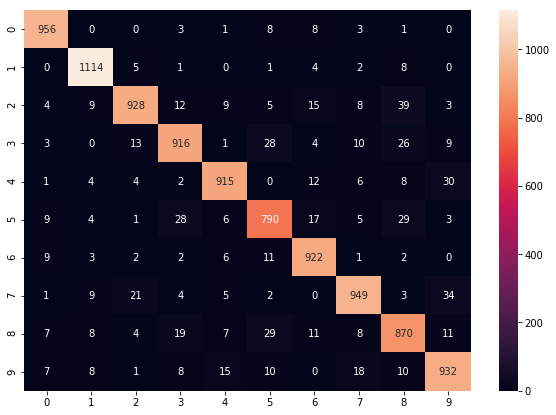

In [22]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot= True, fmt = 'd')

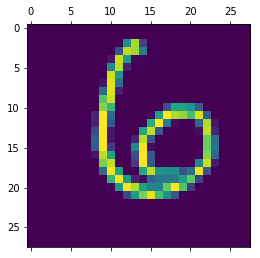

In [23]:
plt.matshow(x_test[100])

In [24]:
y_test[100]

6

In [25]:
y_predicted_labels[100]

6

In [26]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

acc = accuracy_score(y_test,y_predicted_labels)
cm1 = confusion_matrix(y_test, y_predicted_labels)
cr = classification_report(y_test, y_predicted_labels)

print("Accuracy:\n ",acc)
print("Confusion Matrix:\n ",cm1)
print("Classification rep[ort]:\n ",cr)

Accuracy:
  0.9292
Confusion Matrix:
  [[ 956    0    0    3    1    8    8    3    1    0]
 [   0 1114    5    1    0    1    4    2    8    0]
 [   4    9  928   12    9    5   15    8   39    3]
 [   3    0   13  916    1   28    4   10   26    9]
 [   1    4    4    2  915    0   12    6    8   30]
 [   9    4    1   28    6  790   17    5   29    3]
 [   9    3    2    2    6   11  922    1    2    0]
 [   1    9   21    4    5    2    0  949    3   34]
 [   7    8    4   19    7   29   11    8  870   11]
 [   7    8    1    8   15   10    0   18   10  932]]
Classification rep[ort]:
                precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.96      0.98      0.97      1135
           2       0.95      0.90      0.92      1032
           3       0.92      0.91      0.91      1010
           4       0.95      0.93      0.94       982
           5       0.89      0.89      0.89       892
           6       0.93 